In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm


In [9]:
plays = pd.read_csv("files/input/cleaned_plays.csv")


AUC Is  0.780671350029289


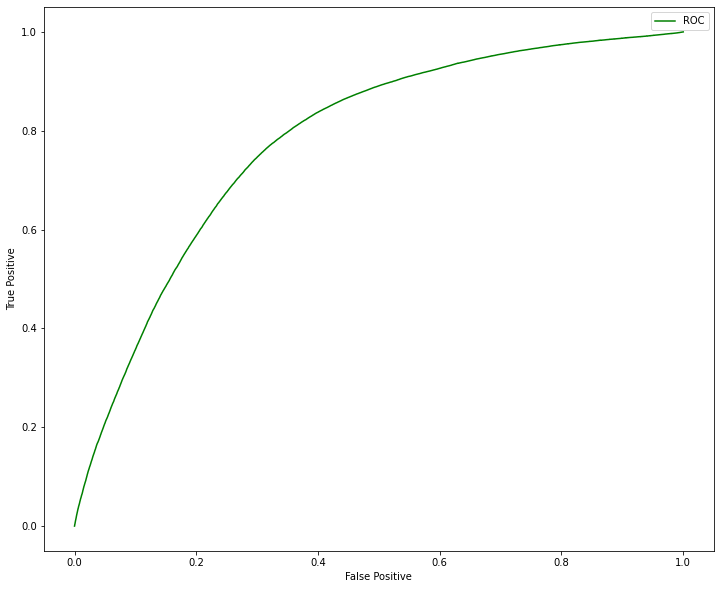

In [10]:

INITIAL_PREDICTOR_COLUMNS = ["season_cumul_run_avg", "season_cumul_pass_avg", "season_run_play_percentage", "is_home_team", "yardline_100", "half_seconds_remaining", "drive", "half", "down", "ydstogo", "shotgun", "score_differential"]


#SET UP TRAINING SPLIT 
x = plays[INITIAL_PREDICTOR_COLUMNS]
y = plays["was_run_play"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.8, random_state=22)

LogReg = LogisticRegression(solver="liblinear").fit(x_train, y_train.ravel())

yhat = LogReg.predict_proba(x_test)
yhat_prob = yhat[:,1]
false_positive,true_positive, trash = roc_curve(y_test, yhat_prob)

plt.figure(figsize=(12,10))
plt.plot(false_positive, true_positive, color="green", label="ROC")

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
print("AUC Is ", roc_auc_score(y_test, yhat_prob))
plt.show()



In [ ]:
logit = sm.Logit(y_train, sm.add_constant(x_train)).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.548144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           was_run_play   No. Observations:                63738
Model:                          Logit   Df Residuals:                    63725
Method:                           MLE   Df Model:                           12
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                  0.1834
Time:                        19:01:18   Log-Likelihood:                -34938.
converged:                       True   LL-Null:                       -42786.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1359      0.095     22.569      0.000      

AUC Is  0.7805966027534457


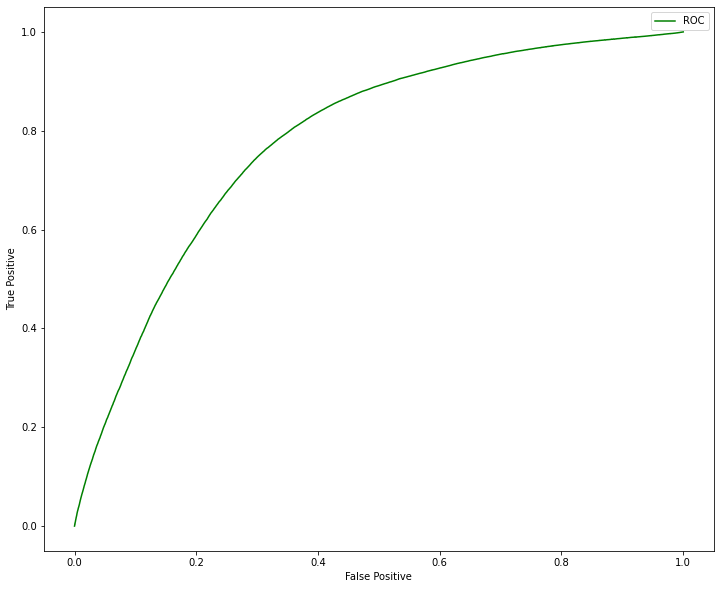

In [33]:
new_predictors = list(set(INITIAL_PREDICTOR_COLUMNS) - {"season_cumul_run_avg", "drive", "half" })

x = plays[new_predictors]
y = plays["was_run_play"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.8, random_state=22)

LogReg = LogisticRegression(solver="liblinear").fit(x_train, y_train.ravel())

yhat = LogReg.predict_proba(x_test)
yhat_prob = yhat[:,1]
false_positive,true_positive, trash = roc_curve(y_test, yhat_prob)

plt.figure(figsize=(12,10))
plt.plot(false_positive, true_positive, color="green", label="ROC")

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
print("AUC Is ", roc_auc_score(y_test, yhat_prob))
plt.show()

In [30]:
seasons = plays["season"].unique()
season_AUCs = {}

for season in seasons:
    x = plays[plays["season"] == season][INITIAL_PREDICTOR_COLUMNS]
    y = plays[plays["season"] == season]["was_run_play"]
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.8, random_state=22)

    LogReg = LogisticRegression(solver="liblinear").fit(x_train, y_train.ravel())

    yhat = LogReg.predict_proba(x_test)
    yhat_prob = yhat[:,1]
    season_AUCs[season] = roc_auc_score(y_test, yhat_prob)
    
    
for k,v in dict(sorted(season_AUCs.items(), key=lambda item: item[1], reverse=True)).items():
    print(f"{k}: {round(v, 2)}")

2017: 0.79
2015: 0.79
2012: 0.79
2014: 0.78
2010: 0.78
2016: 0.78
2018: 0.78
2013: 0.78
2011: 0.78
2009: 0.77


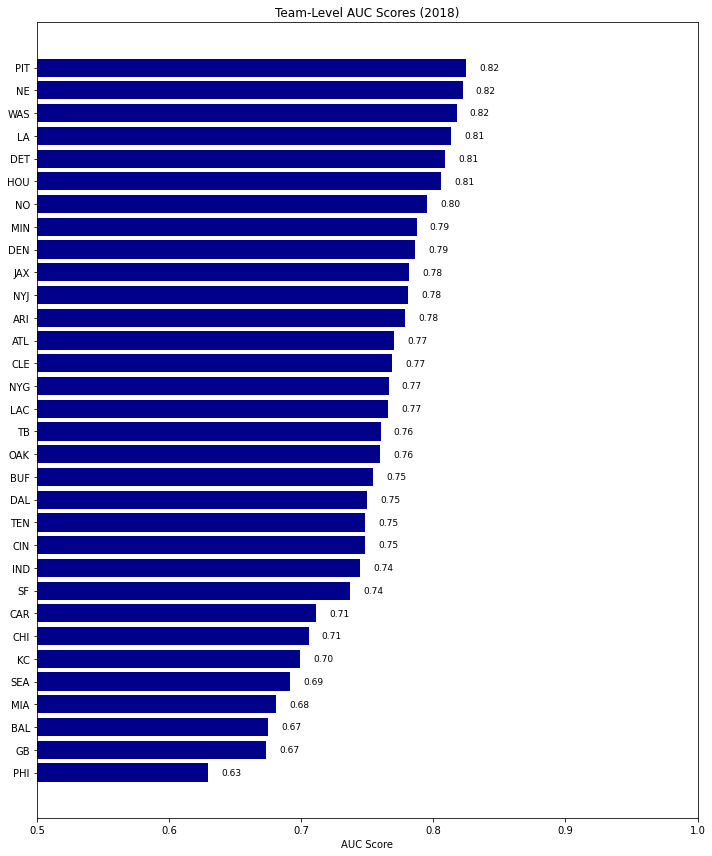

In [29]:
plays_2018 = plays[plays["season"] == 2018]

teams = plays_2018["posteam"].unique()
team_AUCs = {}

for team in teams:
    x = plays_2018[plays_2018["posteam"] == team][INITIAL_PREDICTOR_COLUMNS]
    y = plays_2018[plays_2018["posteam"] == team]["was_run_play"]
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.8, random_state=22)

    LogReg = LogisticRegression(solver="liblinear").fit(x_train, y_train.ravel())

    yhat = LogReg.predict_proba(x_test)
    yhat_prob = yhat[:,1]
    team_AUCs[team] = roc_auc_score(y_test, yhat_prob)
    
# Plot
sorted_aucs = dict(sorted(team_AUCs.items(), key=lambda item: item[1], reverse=True))
teams = list(sorted_aucs.keys())
aucs = list(sorted_aucs.values())

# Plot horizontal bars
plt.figure(figsize=(10, 12))
bars = plt.barh(teams, aucs, color="darkblue")
plt.xlabel("AUC Score")
plt.title("Team-Level AUC Scores (2018)")
plt.xlim(0.5, 1.0)
plt.gca().invert_yaxis()  # Highest AUC at top

# Annotate each bar with its AUC value
for bar, value in zip(bars, aucs):
    plt.text(value + 0.01, bar.get_y() + bar.get_height() / 2,
             f"{value:.2f}", va="center", fontsize=9)

plt.tight_layout()
plt.show()

    


2017: 0.79
2015: 0.79
2012: 0.79
2014: 0.78
2010: 0.78
2016: 0.78
2018: 0.78
2013: 0.78
2011: 0.78
2009: 0.77
